<a href="https://colab.research.google.com/github/Akshaya-hub/Home-Rent-Estimator/blob/Notebook/Home_rent_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
df = pd.read_csv("/content/new_house.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [13]:
df.head(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,rent_scale,size_scale
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,0,5
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,1,3
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,1,4
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,0,3
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,0,4


In [14]:
df.isnull().any()

,0
Posted On,False
BHK,False
Rent,False
Size,False
Floor,False
Area Type,False
Area Locality,False
City,False
Furnishing Status,False
Tenant Preferred,False


In [15]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [16]:
df.shape

(4034, 13)

In [17]:
df.dtypes

,0
Posted On,object
BHK,int64
Rent,int64
Size,int64
Floor,object
Area Type,object
Area Locality,object
City,object
Furnishing Status,object
Tenant Preferred,object


In [18]:
df['Posted On']=pd.to_datetime(df['Posted On'])

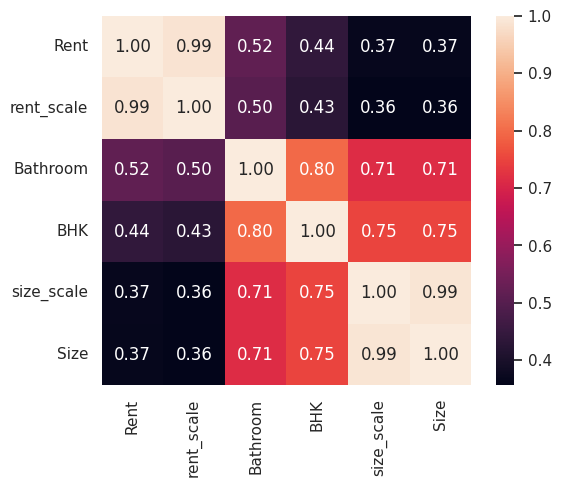

In [22]:

numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr(method='pearson')

# 3. Top 10 features most correlated with 'Rent'
if 'Rent' in correlation.columns:
    columns = correlation.nlargest(10, 'Rent')['Rent'].index
    correlation_map = np.corrcoef(numeric_df[columns].values.T)

    # 5. Plot heatmap
    sns.set(font_scale=1.0)
    heatmap = sns.heatmap(
        correlation_map,
        cbar=True,
        annot=True,
        square=True,
        fmt='.2f',
        yticklabels=columns.values,
        xticklabels=columns.values
    )
    plt.show()



In [23]:
df.describe()

,Posted On,BHK,Rent,Size,Bathroom,rent_scale,size_scale
count,4034,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000
mean,2022-06-07 00:33:54.705007616,1.956619,21136.924641,876.352008,1.812593,1.130392,3.696331
min,2022-04-23 00:00:00,1.000000,1500.000000,48.000000,1.000000,0.000000,0.000000
25%,2022-05-19 00:00:00,1.000000,9500.000000,579.250000,1.000000,0.000000,2.000000
50%,2022-06-08 00:00:00,2.000000,15000.000000,800.000000,2.000000,1.000000,3.000000
75%,2022-06-27 00:00:00,2.000000,25000.000000,1100.000000,2.000000,1.000000,5.000000
max,2022-07-11 00:00:00,3.000000,120000.000000,2400.000000,3.000000,9.000000,9.000000
std,NaN,0.676811,18531.391687,422.647679,0.658786,1.589656,2.090502


In [24]:
#Since Rent and Size columns has large values
df['Rent'] = np.log(df['Rent'])
df['Size'] = np.log(df['Size'])

In [25]:
df.describe()

,Posted On,BHK,Rent,Size,Bathroom,rent_scale,size_scale
count,4034,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000
mean,2022-06-07 00:33:54.705007616,1.956619,9.680559,6.639008,1.812593,1.130392,3.696331
min,2022-04-23 00:00:00,1.000000,7.313220,3.871201,1.000000,0.000000,0.000000
25%,2022-05-19 00:00:00,1.000000,9.159047,6.361734,1.000000,0.000000,2.000000
50%,2022-06-08 00:00:00,2.000000,9.615805,6.684612,2.000000,1.000000,3.000000
75%,2022-06-27 00:00:00,2.000000,10.126631,7.003065,2.000000,1.000000,5.000000
max,2022-07-11 00:00:00,3.000000,11.695247,7.783224,3.000000,9.000000,9.000000
std,NaN,0.676811,0.714843,0.572223,0.658786,1.589656,2.090502


In [26]:
columns=columns.drop(['size_scale','rent_scale'])
columns=columns.drop(['Rent'])

In [27]:
columns

Index(['Bathroom', 'BHK', 'Size'], dtype='object')

In [28]:
X = df[columns]
Y = df['Rent'].values

In [29]:
#Splitting the datset into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=42)

### Importing the Regression Libraries

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [31]:
from sklearn.metrics import mean_squared_error
linear = LinearRegression()
linear.fit(X_train, Y_train)
pred=linear.predict(X_test)
#model is good if R square is high, and MSE is lowest
linear_rsq = (linear.score(X_test,Y_test))*100

linear_mse = mean_squared_error(pred, Y_test)

In [32]:
lasso = Lasso()
lasso.fit(X_train, Y_train)
lasso_pred=lasso.predict(X_test)
#model is good if R square is high, and MSE is lowest
lasso_rsq = (lasso.score(X_test,Y_test))*100

lasso_mse = mean_squared_error(lasso_pred, Y_test)


In [33]:
el = ElasticNet()
el.fit(X_train, Y_train)
el_pred=el.predict(X_test)
#model is good if R square is high, and MSE is lowest
el_rsq = (el.score(X_test,Y_test))*100

el_mse = mean_squared_error(el_pred, Y_test)

In [34]:
dec = DecisionTreeRegressor()
dec.fit(X_train, Y_train)
dec_pred=dec.predict(X_test)
#model is good if R square is high, and MSE is lowest
dec_rsq = (dec.score(X_test,Y_test))*100

dec_mse = mean_squared_error(dec_pred, Y_test)

In [35]:
kn = KNeighborsRegressor()
kn.fit(X_train, Y_train)
kn_pred=kn.predict(X_test)
#model is good if R square is high, and MSE is lowest
kn_rsq = (kn.score(X_test,Y_test))*100

kn_mse = mean_squared_error(kn_pred, Y_test)

In [36]:
grad = GradientBoostingRegressor()
grad.fit(X_train, Y_train)
grad_pred=grad.predict(X_test)
#model is good if R square is high, and MSE is lowest
grad_rsq = (grad.score(X_test,Y_test))*100

grad_mse = mean_squared_error(grad_pred, Y_test)

In [37]:

list_reg=['Linear','Lasso','ElasticNet','Decision Tree','KNeighbors','Gradient Boost']
data = {'Regressor': list_reg, 'R Score': [linear_rsq, lasso_rsq, el_rsq,dec_rsq,kn_rsq,grad_rsq], 'MSE':[linear_mse, lasso_mse, el_mse,dec_mse,kn_mse,grad_mse]}
reg_df=pd.DataFrame(data)
reg_df

,Regressor,R Score,MSE
0,Linear,38.095914,0.306778
1,Lasso,-0.212319,0.496622
2,ElasticNet,-0.212319,0.496622
3,Decision Tree,36.596259,0.314210
4,KNeighbors,31.219332,0.340856
5,Gradient Boost,44.308434,0.275991


In [38]:
import pickle
pickle.dump(grad,open('regression.pkl','wb'))